<a href="https://colab.research.google.com/github/linainsaf/image_audio_processing/blob/main/Corner_detection_in_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

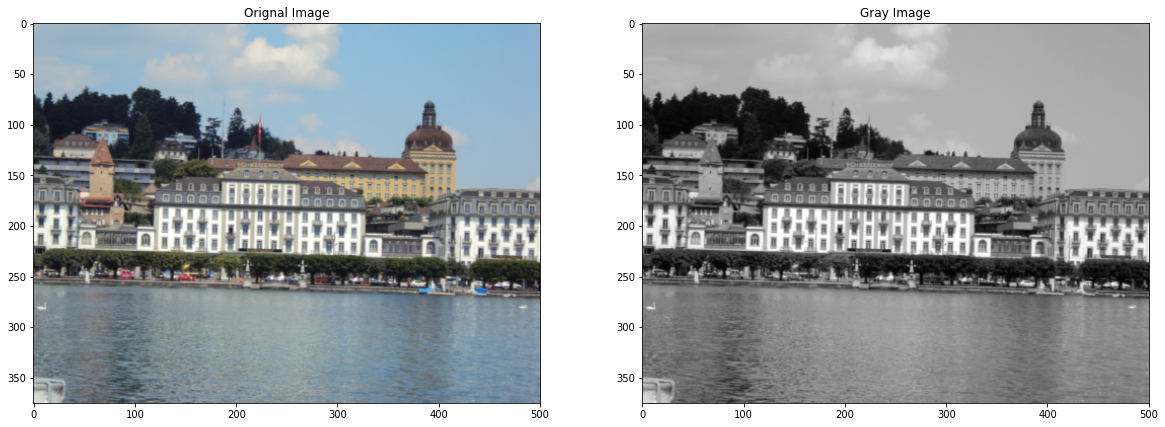

In [ ]:
# Load the image
image1 = cv2.imread('drive/MyDrive/TP_Image_M2/pics/P1.JPG')

# Convert  image to RGB
image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert image to gray scale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Display image and gray image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Orignal Image")
plots[0].imshow(image)

plots[1].set_title("Gray Image")
plots[1].imshow(gray, cmap="gray")

Number of Keypoints Detected In The Image:  1790


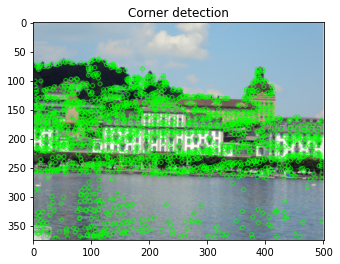

In [ ]:
fast = cv2.FastFeatureDetector_create() 


# Detect keypoints without non max suppression
keypoints = fast.detect(gray, 80)

# Draw keypoints on top of the input image
cv2.drawKeypoints(image, keypoints, image, color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.imshow(image)
plt.title("Corner detection")

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Image: ", len(keypoints))

In [ ]:
print(keypoints)

[<KeyPoint 0x7fbae9a22f60>, <KeyPoint 0x7fbae9a22120>, <KeyPoint 0x7fbae9a228d0>, <KeyPoint 0x7fbae9a22570>, <KeyPoint 0x7fbae9a22930>, <KeyPoint 0x7fbae9a22900>, <KeyPoint 0x7fbae9a22d80>, <KeyPoint 0x7fbae9a22210>, <KeyPoint 0x7fbae9a22600>, <KeyPoint 0x7fbae9a22c30>, <KeyPoint 0x7fbae9a22180>, <KeyPoint 0x7fbae99a2e40>, <KeyPoint 0x7fbae99a2180>, <KeyPoint 0x7fbae99a21e0>, <KeyPoint 0x7fbae99a2450>, <KeyPoint 0x7fbae99a2210>, <KeyPoint 0x7fbae99a2e70>, <KeyPoint 0x7fbae99a27b0>, <KeyPoint 0x7fbae99a2ea0>, <KeyPoint 0x7fbae99d2180>, <KeyPoint 0x7fbae99d21b0>, <KeyPoint 0x7fbae99d2030>, <KeyPoint 0x7fbae99d20f0>, <KeyPoint 0x7fbae99d2090>, <KeyPoint 0x7fbae99d2150>, <KeyPoint 0x7fbae99d2720>, <KeyPoint 0x7fbae99d2210>, <KeyPoint 0x7fbae9960810>, <KeyPoint 0x7fbae9960bd0>, <KeyPoint 0x7fbae9960b10>, <KeyPoint 0x7fbae99609c0>, <KeyPoint 0x7fbae99600f0>, <KeyPoint 0x7fbae99601e0>, <KeyPoint 0x7fbae9960360>, <KeyPoint 0x7fbae9960030>, <KeyPoint 0x7fbae99600c0>, <KeyPoint 0x7fbae99603c0>, 

In [ ]:
def fast_detector(image,seuil):
  rows,cols=image.shape
  d1_ok=[]
  corners=[]
  for row in range(rows-3):
    for col in range(cols-3):
      Ip=image[row,col]
      dx=[-3,-3,-2,-1,0,1,2,3,3,3,2,1,0,-1,-2,-3]
      dy=[0,1,2,3,3,3,2,1,0,-1,-2,-3,-3,-3,-2,-1]
      u=np.array(row)+dx
      v=np.array(col)+dy
      ind=image[u,v]
      d1=(ind>Ip+seuil).astype('int')
      d2=(ind<Ip-seuil).astype('int')
      d1_ok=any(np.convolve(np.append(d1,d1),np.ones(12))==12)
      if d1_ok:
        corners.append([row,col])     
  return corners

In [ ]:
corners=fast_detector(gray,25)

In [ ]:
len(corners)

1075

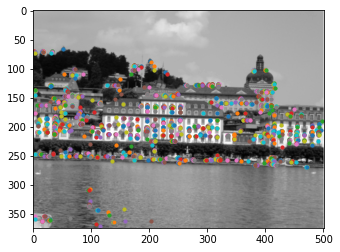

In [ ]:

implot = plt.imshow(gray, cmap='gray')
for point in corners:
    plt.scatter(point[1], point[0], s=10)
plt.show()